# 📊 Customer Churn Prediction - End-to-End Notebook

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('../data/customer_churn.csv')
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,No,1,No,DSL,29.85,29.85,No
1,Female,1,No,No,34,Yes,Fiber optic,56.95,1889.50,No
2,Female,0,No,Yes,2,Yes,DSL,53.85,108.15,Yes
3,Male,1,Yes,No,45,Yes,Fiber optic,42.30,1840.75,No
4,Female,0,No,Yes,5,No,DSL,70.70,151.65,Yes


## 🔍 Data Overview

In [2]:

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           5 non-null      object 
 1   SeniorCitizen    5 non-null      int64  
 2   Partner          5 non-null      object 
 3   Dependents       5 non-null      object 
 4   tenure           5 non-null      int64  
 5   PhoneService     5 non-null      object 
 6   InternetService  5 non-null      object 
 7   MonthlyCharges   5 non-null      float64
 8   TotalCharges     5 non-null      float64
 9   Churn            5 non-null      object 
dtypes: float64(2), int64(2), object(6)
memory usage: 528.0+ bytes


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5.000000,5.000000,5.000000,5.000000
mean,0.400000,17.400000,50.730000,803.980000
std,0.547723,20.598544,15.445574,969.824311
min,0.000000,1.000000,29.850000,29.850000
25%,0.000000,2.000000,42.300000,108.150000
50%,0.000000,5.000000,53.850000,151.650000
75%,1.000000,34.000000,56.950000,1840.750000
max,1.000000,45.000000,70.700000,1889.500000


## 📈 Churn Distribution

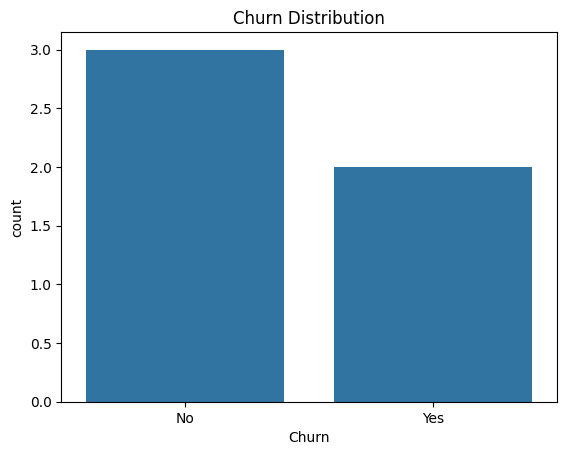

In [3]:

sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.show()


## 🔧 Data Cleaning

In [4]:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()


## 🧼 Preprocessing

In [11]:

from sklearn.preprocessing import LabelEncoder, StandardScaler

df_processed = df.copy()
label_encoders = {}
for col in df_processed.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le

scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_processed[num_cols] = scaler.fit_transform(df_processed[num_cols])

X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']


## 🤖 Model Training & Evaluation

c:\Users\RXZ\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\RXZ\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\RXZ\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



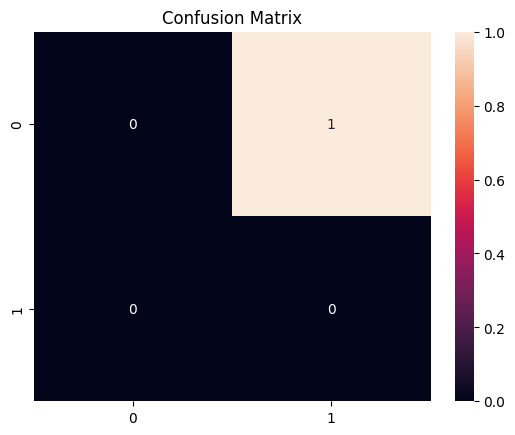

In [12]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()


## 🔍 Feature Importance

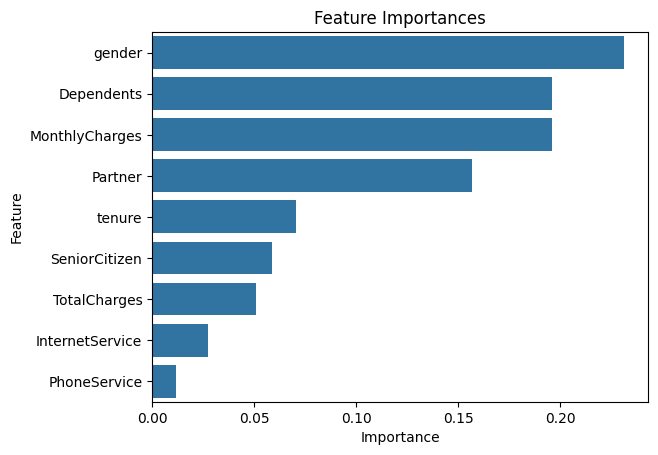

In [13]:

importances = clf.feature_importances_
feat_names = X.columns
importance_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title("Feature Importances")
plt.show()


## 💾 Save Model

In [18]:

import joblib
joblib.dump(clf, '../churn_model.pkl')


['../churn_model.pkl']